# Sorting
In the lab works you've seen how to sort any list. 
One way to write this sorting function is as follows:

In [2]:
def find_min_index(L):
    current_index = 0
    current_min = L[0]
    for j in range(1,len(L)):
        if current_min > L[j]:
            current_min = L[j]
            current_index = j
    return current_index

In [3]:
def sort(L):
    if len(L)<=1:
        return L # a one-element list is always sorted
    min_idx = find_min_index(L)
    
    L[0], L[min_idx] = L[min_idx], L[0] 
    # switch minimum element to first location
    
    return [L[0]] + sort(L[1:len(L)])

In [4]:
sort([3,1,4,1,5,9,2])

[1, 1, 2, 3, 4, 5, 9]

............................................................plot_steps: True
0.161 micro-seconds per step
(array([2], dtype=int64),)
Curve (steps): $0.4n^2$


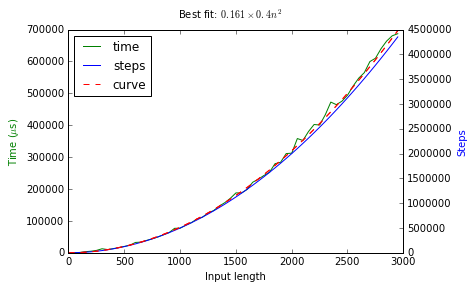

In [24]:
# running time of our sort() function on inputs from size 0 to 3000

What is the shape of this curve? Have you seen it before?

It turns out that for sorting a list of $n$ elements, our algorithm will take about $10^{-7}n^2$ seconds.

Facebook has $1,000,000,000 = 10^9$ users.
If they wanted to sort the list of their users using this algorithm it will take them  about 
$10^{-7}(10^9)^2 = 10^{-7}10^{18}= 10^{11}$ seconds.

In [7]:
print (10**11 / (60*60*24*365)), " years!"

3170  years!


The problem is that when $n$ becomes big, $n^2$ becomes much bigger.

If we had an algorithm that runs in $10^{-7}n$ seconds, then we could sort Facebook's users in $0.01$ seconds.
Even an algorithm that runs in time $10^{-2}n$ would take less than twenty minutes to do it. 

We see that the effect of $n$ vs. $n^2$ is much more important than the effect of the constant.

Where does the $n^2$ come from?

In [9]:
def find_min_index(L):
    current_index = 0
    current_min = L[0]
    for j in range(1,len(L)):
        sys.stdout.write('*')
        if current_min > L[j]:
            current_min = L[j]
            current_index = j
    return current_index

In [10]:
def sort(L):
    if len(L)<=1:
        return L # a one-element list is always sorted
    min_idx = find_min_index(L)
    print ""
    L[0], L[min_idx] = L[min_idx], L[0] 
    # switch minimum element to first location
    
    return [L[0]] + sort(L[1:len(L)])

In [11]:
sort([10,9,8,7,6,5,4,3,2,1])

*********
********
*******
******
*****
****
***
**
*


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

The number of steps we take to sort a list of length $n$ is about $n+(n-1)+(n-2)+\cdots+2+1 = \tfrac{n(n+1)}{2}=0.5n^2+0.5n$

__Can we do better?__

Turns out that the answer is __yes__ 

There is a different sorting algorithm for which the running time looks like:

....................................................................................................plot_steps: False
1.000 micro-seconds per step
(array([3, 4], dtype=int64),)
Curve (steps): $0.2n\log n$


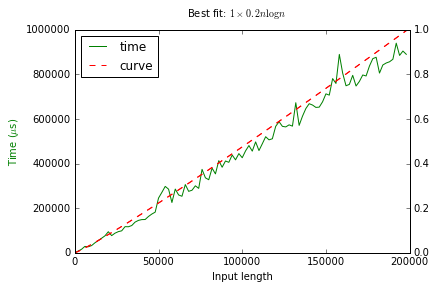

In [21]:
# running time of alternative sorting algorithm for inputs from size 0 to 200,000

That is, sorting $n$ elements takes about $5\cdot 10^{-7}n\log_2 n$ seconds. 
$\log_2 n$ is much smaller than $n$ ($\log_2 (10,000,000) < 30$) and so this is much better.

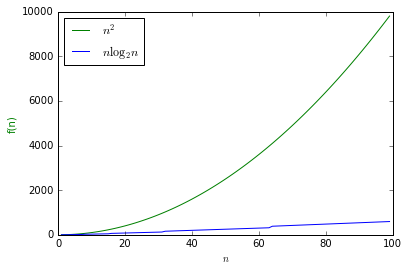

In [30]:
# compare n*log(n) vs n^2

In particular this algorithm will take about $5\cdot 10^{-7}\cdot 10^9 \cdot 30 = 150\cdot 10^2 = 1500$ seconds or 25 minutes to sort the Facebook user list

This is $10^9$ times faster than what it would take in the slower sorting algorithm!!

Even if Facebook has a computer that is a million times faster than my laptop, it would still take them more time than for me to sort this list. 

__The cleverness of the algorithm is more important than the speed of the machine!__

# A smarter sorting algorithm

Our sorting algorithm had the following general operation on a list of size $n$:

1. Find the minimum element and put it at the beginning.
2. Sort the last  $n-1$ elements.

As we saw the number of steps looked something like this:

We will show the __merge sort__ algorithm that does the following on a list of size $n$:

1. Sort the first $n/2$ elements to get a list $L1$ and the last $n/2$ elements to get a list $L2$.
2. Merge the two lists together to one sorted list.

It turns out that the number of steps it takes looks like the following:

In [31]:
# illustration of number of steps sorting 20 numbers in selection sort vs merge sort

******************************          ******************************
*****************************           ***************
****************************            *******
***************************             ***
**************************              *
*************************               *
************************                ***
***********************                 *
**********************                  *
*********************                   *******
********************                    ***
*******************                     *
******************                      *
*****************                       ***
****************                        *
***************                         *
**************                          ***************
*************                           *******
************                            ***
***********                             *
**********                              *
*********                        

..............................plot_steps: False
1.000 micro-seconds per step
..............................plot_steps: True
0.611 micro-seconds per step


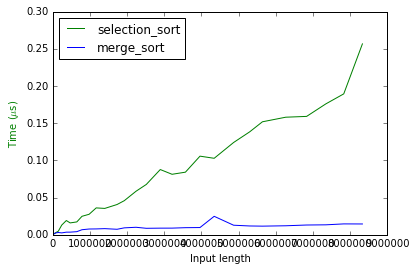

In [16]:
# comparison of running time of selection sort and merge sort

[Sorting demo by Justin Johnson](http://cs.stanford.edu/people/jcjohns/sorting.js/)

### Sorting with different keys

Recall the bonus homework exercise of sorting an array by __last name__:

In [12]:
names = ['abinet mulugeta', 'urgie  huseien', 'yonatan wosenyeleh', 'amanuel asfaw', 'tibebu solomon', 'hailegbrel wudneh', 'gatluk chuol', 'elsabet buzuneh', 'eden ketema', 'maeden seid', 'mikyas legese', 'meskerem birhanu demeke', 'kumneger worku', 'shambel abate', 'hailmeskel shimeles', 'tsega hailu', 'dawit fikeru', 'asmare habitamo', 'zelalem ades', 'betelehem eshetu', 'yosef tadiwos', 'haymanot gidena', 'henock mersha', 'binyam kidane', 'mohammed nur', 'bethelehem walelegn', 'lewi mekonnen', 'wondimu yohanes', 'hodo mukitar', 'yonas adugna', 'tigabu gebrecherkos', 'nardos gesese', 'mohammed nur', 'abdurezak temam', 'shambel elena', 'adem mohamed', 'zakira tebarek', 'lidya gegnaw', 'knesa desta', 'ibrahim ahmed', 'betlehem desalegn', 'adonay geremew', 'kalkidan muluneh', 'haile gebreselasie', 'eden tekilu tilahun', 'ayantu aleneh', 'yosef nosha', 'mebrihity girmay', 'finet hailu', 'elisa feloh', 'bezawit gebremariam', 'nigusu terefe', 'amina bedrie', 'kiflom leuel', 'hana tariku', 'nejat beshir', 'mesfen tamiru', 'shafi abdi', 'kelbesa ambesa', 'abrham tuna', 'daniel hagos', 'yordanos jemberu', 'aman musa', 'habene abdi', 'kawuser jemal', 'tariku erina', 'mesigina gebretsadik', 'yetnayet birhanu', 'semer abrar', 'nur ahmed', 'eman hasen', 'natol gizaw', 'banchayehu asrat', 'hilina thewodros', 'hasen ali', 'mebrihatu lebelo', 'yosef enawgaw', 'nesera teyib', 'mekdes muluneh', 'surafel sewutu', 'mentesenot tefera']

In [13]:
'zelalem ades' < 'betelehem eshetu'

False

### Our approach:

We define a function ```last_name``` such that: 

In [15]:
last_name('zelalem ades')

'ades'

In [16]:
last_name('betelehem eshetu')

'eshetu'

In [17]:
last_name('zelalem ades') < last_name('betelehem eshetu')

True

So we only have to change our comparisons from using ```s > t``` to using ```last_name(s) > last_name(t)```

In particular it is enough to modify ```find_min_index``` as follows.

From:

In [18]:
def find_min_index(L):
    current_index = 0
    current_min = L[0]
    for j in range(1,len(L)):
        if current_min > L[j]:
            current_min = L[j]
            current_index = j
    return current_index

To:

In [19]:
def find_min_index(L):
    current_index = 0
    current_min = L[0]
    for j in range(1,len(L)):
        if last_name(current_min) > last_name(L[j]):
            current_min = L[j]
            current_index = j
    return current_index

Recall that the code of sort was the following:

In [20]:
def sort(L):
    if len(L)<=1:
        return L # a one-element list is always sorted
    min_idx = find_min_index(L)
    print ""
    L[0], L[min_idx] = L[min_idx], L[0] 
    # switch minimum element to first location
    
    return [L[0]] + sort(L[1:len(L)])

_There is no need to change it!_

In [21]:
sort(names)

['shambel abate',
 'shafi abdi',
 'habene abdi',
 'semer abrar',
 'zelalem ades',
 'yonas adugna',
 'ibrahim ahmed',
 'nur ahmed',
 'ayantu aleneh',
 'hasen ali',
 'kelbesa ambesa',
 'amanuel asfaw',
 'banchayehu asrat',
 'amina bedrie',
 'nejat beshir',
 'yetnayet birhanu',
 'meskerem birhanu demeke',
 'elsabet buzuneh',
 'gatluk chuol',
 'betlehem desalegn',
 'knesa desta',
 'shambel elena',
 'yosef enawgaw',
 'tariku erina',
 'betelehem eshetu',
 'elisa feloh',
 'dawit fikeru',
 'tigabu gebrecherkos',
 'bezawit gebremariam',
 'haile gebreselasie',
 'mesigina gebretsadik',
 'lidya gegnaw',
 'adonay geremew',
 'nardos gesese',
 'haymanot gidena',
 'mebrihity girmay',
 'natol gizaw',
 'asmare habitamo',
 'daniel hagos',
 'finet hailu',
 'tsega hailu',
 'eman hasen',
 'urgie  huseien',
 'kawuser jemal',
 'yordanos jemberu',
 'eden ketema',
 'binyam kidane',
 'mebrihatu lebelo',
 'mikyas legese',
 'kiflom leuel',
 'lewi mekonnen',
 'henock mersha',
 'adem mohamed',
 'hodo mukitar',
 'abi

Now all that is left is to write the function ```last_name```, which will be an exercise for you.

# Sorting in python

Python provides a built-in function ```sorted''

In [22]:
sorted(names)

['abdurezak temam',
 'abinet mulugeta',
 'abrham tuna',
 'adem mohamed',
 'adonay geremew',
 'aman musa',
 'amanuel asfaw',
 'amina bedrie',
 'asmare habitamo',
 'ayantu aleneh',
 'banchayehu asrat',
 'betelehem eshetu',
 'bethelehem walelegn',
 'betlehem desalegn',
 'bezawit gebremariam',
 'binyam kidane',
 'daniel hagos',
 'dawit fikeru',
 'eden ketema',
 'eden tekilu tilahun',
 'elisa feloh',
 'elsabet buzuneh',
 'eman hasen',
 'finet hailu',
 'gatluk chuol',
 'habene abdi',
 'haile gebreselasie',
 'hailegbrel wudneh',
 'hailmeskel shimeles',
 'hana tariku',
 'hasen ali',
 'haymanot gidena',
 'henock mersha',
 'hilina thewodros',
 'hodo mukitar',
 'ibrahim ahmed',
 'kalkidan muluneh',
 'kawuser jemal',
 'kelbesa ambesa',
 'kiflom leuel',
 'knesa desta',
 'kumneger worku',
 'lewi mekonnen',
 'lidya gegnaw',
 'maeden seid',
 'mebrihatu lebelo',
 'mebrihity girmay',
 'mekdes muluneh',
 'mentesenot tefera',
 'mesfen tamiru',
 'mesigina gebretsadik',
 'meskerem birhanu demeke',
 'mikyas 

The function can even sort in reverse:

In [23]:
sorted(names, reverse=True)

['zelalem ades',
 'zakira tebarek',
 'yosef tadiwos',
 'yosef nosha',
 'yosef enawgaw',
 'yordanos jemberu',
 'yonatan wosenyeleh',
 'yonas adugna',
 'yetnayet birhanu',
 'wondimu yohanes',
 'urgie  huseien',
 'tsega hailu',
 'tigabu gebrecherkos',
 'tibebu solomon',
 'tariku erina',
 'surafel sewutu',
 'shambel elena',
 'shambel abate',
 'shafi abdi',
 'semer abrar',
 'nur ahmed',
 'nigusu terefe',
 'nesera teyib',
 'nejat beshir',
 'natol gizaw',
 'nardos gesese',
 'mohammed nur',
 'mohammed nur',
 'mikyas legese',
 'meskerem birhanu demeke',
 'mesigina gebretsadik',
 'mesfen tamiru',
 'mentesenot tefera',
 'mekdes muluneh',
 'mebrihity girmay',
 'mebrihatu lebelo',
 'maeden seid',
 'lidya gegnaw',
 'lewi mekonnen',
 'kumneger worku',
 'knesa desta',
 'kiflom leuel',
 'kelbesa ambesa',
 'kawuser jemal',
 'kalkidan muluneh',
 'ibrahim ahmed',
 'hodo mukitar',
 'hilina thewodros',
 'henock mersha',
 'haymanot gidena',
 'hasen ali',
 'hana tariku',
 'hailmeskel shimeles',
 'hailegbrel w

and take a key:

In [24]:
sorted(names,key=last_name)

['shambel abate',
 'shafi abdi',
 'habene abdi',
 'semer abrar',
 'zelalem ades',
 'yonas adugna',
 'ibrahim ahmed',
 'nur ahmed',
 'ayantu aleneh',
 'hasen ali',
 'kelbesa ambesa',
 'amanuel asfaw',
 'banchayehu asrat',
 'amina bedrie',
 'nejat beshir',
 'meskerem birhanu demeke',
 'yetnayet birhanu',
 'elsabet buzuneh',
 'gatluk chuol',
 'betlehem desalegn',
 'knesa desta',
 'shambel elena',
 'yosef enawgaw',
 'tariku erina',
 'betelehem eshetu',
 'elisa feloh',
 'dawit fikeru',
 'tigabu gebrecherkos',
 'bezawit gebremariam',
 'haile gebreselasie',
 'mesigina gebretsadik',
 'lidya gegnaw',
 'adonay geremew',
 'nardos gesese',
 'haymanot gidena',
 'mebrihity girmay',
 'natol gizaw',
 'asmare habitamo',
 'daniel hagos',
 'tsega hailu',
 'finet hailu',
 'eman hasen',
 'urgie  huseien',
 'kawuser jemal',
 'yordanos jemberu',
 'eden ketema',
 'binyam kidane',
 'mebrihatu lebelo',
 'mikyas legese',
 'kiflom leuel',
 'lewi mekonnen',
 'henock mersha',
 'adem mohamed',
 'hodo mukitar',
 'abi

It is also quite fast:

..........plot_steps: False
1.000 micro-seconds per step
..........plot_steps: True
0.506 micro-seconds per step


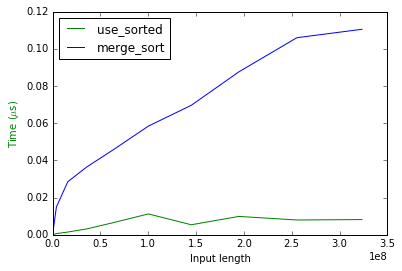

In [47]:
# merge sort vs Python built-in sorted algorithm

# Why teach sorting?

We saw that Python gives you sorting "for free"

and it's even faster than the best algorithm we could write.

So why force you to learn and code sorting algorithms?

__Answer 1:__ Computer Science and programming is more than just Python. 

__Answer 2:__ I am not trying to teach you to sort numbers. I am trying to teach you how to think.

# Lab work

### Exercise 1

Write a function ```sort4``` that sorts a list of 4 elements. The function should make two calls to ```sort2```

In [25]:
def sort4(L):
    L_first_sorted = sort2(L[0:2])
    L_last_sorted = sort2(L[2:4])
    #
    # do something to return a sorted list
    #    

In [27]:
sort4([10,2,5,7])

[2, 5, 7, 10]

### Exercise 2

Write a function ```merge_lists``` that takes two sorted lists L1 and L2 and returns a sorted list that of length ```len(L1)+len(L2)``` that   contains all their elements.

### Exercise 3

Write a function ```sort32``` that sorts a list of 32 elements. The function should make two recursive calls to a provided function ```sort16```

In [51]:
def sort32(L):
    L_first_sorted = sort16(L[0:4])
    L_last_sorted = sort16(L[4:8])
    #
    # do something to return a sorted list
    #    

In [29]:
sort16 = sorted

In [31]:
sort32([32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1])

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32]

### Exercise 4

Write a function ```merge_sort``` that will sort a list of _any_ size. The function should make two recursive calls to itself 

In [5]:
def merge_sort(L):
    #
    # do something here
    #
    L_first_sorted = merge_sort(L[0:int(len(L)/2)])
    L_last_sorted = merge_sort(L[int(len(L)/2):len(L)])
    #
    # do something to return a sorted list

In [33]:
merge_sort([78, 39, 50, 43, 3, 30, 34, 75, 33, 7, 30, 71, 76, 44, 27, 4, 68, 21, 51, 78, 11, 53, 71, 60, 64, 9, 28, 63, 55, 34, 44, 52, 28, 52, 43, 44, 4, 41, 40, 17])

[3,
 4,
 4,
 7,
 9,
 11,
 17,
 21,
 27,
 28,
 28,
 30,
 30,
 33,
 34,
 34,
 39,
 40,
 41,
 43,
 43,
 44,
 44,
 44,
 50,
 51,
 52,
 52,
 53,
 55,
 60,
 63,
 64,
 68,
 71,
 71,
 75,
 76,
 78,
 78]

### Exercise 5
Use a stopwatch to compare selection sort and merge sort on random lists of 4000 numbers.
Run each one of them 10 times and record the average time. 

_(if your computer crashes then you can use smaller lists, you can also use the %timeit option as below)_

In [12]:
def gen_random_list(n):
    return [random.randint(0,2*n) for i in range(n)]

In [36]:
# run this code so that Python allows you to run the sorts on inputs larger than 100
import sys
sys.setrecursionlimit(10**6)

In [ ]:
% timeit merge_sort(gen_random_list(4000));

In [ ]:
% timeit sort(gen_random_list(4000)); 
# your selection sort function from the previous labwork or from the lecture

### Exercise 6

Write a function ```last_name``` that on input a string $s$, will find the first space character ' ' in $s$, and will return the rest of $s$. You don't have to worry about strings that don't contain spaces or contain more than one space.

In [34]:
last_name('boaz barak')

'barak'

### Exercise 7 (bonus)

Write a function ```cannon_ball_no_gravity(angle,speed,t)``` that on input an angle ```angle``` between $0$ and $90$ and a speed ```speed``` in meters per second, and time $t$ in seconds, returns two values ```height,distance``` .

The value ```height```  will be which are the height in meters that a cannon ball shot at angle $angle$ from the ground and speed $speed$ would be at after $t$ seconds if there is no gravity. 

The value ```distance``` will be the distance in meters that the projection of this ball on the ground would be from the initial point after $t$ seconds. 

Write a function ```cannon_ball_earth(angle,speed,t)``` that does the same thing if the ball is shot on earth and takes gravity into account.

(You don't need to worry about air resistance nor about whether height becomes negative).

You can use the following helper functions:

In [35]:
import math
def sine(angle):
    return math.sin((angle/360.0)*2*math.pi)
def cosie(angle):
    return math.cos((angle/360.0)*2*math.pi)